In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


UNET++ with combination of jaccard index and dice index loss function.

In [12]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)


def jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)
# Custom loss function
def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def bce_dice_loss(y_true, y_pred):
    return 0.5 * tf.keras.losses.binary_crossentropy(y_true, y_pred) - dice_coef(y_true, y_pred)







def unet_Plus_Plus(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs
    
    #00
    layer_0_0 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    layer_0_0 = Dropout(0.2) (layer_0_0)
    layer_0_0 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_0_0)
    layer_0_0 = Dropout(0.2) (layer_0_0)
    p_1_0 = MaxPooling2D((2, 2))(layer_0_0)

    #10
    layer_1_0 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p_1_0)
    layer_1_0 = Dropout(0.2) (layer_1_0)
    layer_1_0 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_1_0)
    layer_1_0 = Dropout(0.2) (layer_1_0)
    p_2_0 = MaxPooling2D((2, 2))(layer_1_0)

    #20
    layer_2_0 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p_2_0)
    layer_2_0 = Dropout(0.2) (layer_2_0)
    layer_2_0 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_2_0)
    layer_2_0 = Dropout(0.2) (layer_2_0)
    p_3_0 = MaxPooling2D((2, 2))(layer_2_0)


    #30
    layer_3_0 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p_3_0)
    layer_3_0 = Dropout(0.2) (layer_3_0)
    layer_3_0 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_3_0)
    layer_3_0 = Dropout(0.2) (layer_3_0)
    p_4_0 = MaxPooling2D(pool_size=(2, 2))(layer_3_0)

    #40
    layer_4_0 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p_4_0)
    layer_4_0 = Dropout(0.2) (layer_4_0)
    layer_4_0 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_4_0)
    layer_4_0 = Dropout(0.2) (layer_4_0)
    #01
    conv_0_1 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(layer_1_0)
    conv_0_1= concatenate([conv_0_1,layer_0_0])
    layer_0_1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_0_1)
    layer_0_1 = Dropout(0.2) (layer_0_1)
    layer_0_1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_0_1)
    layer_0_1 = Dropout(0.2) (layer_0_1)
    # p_0_1 = MaxPooling2D((2, 2))(layer_0_1)

    #11
    conv_1_1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(layer_2_0)
    conv_1_1= concatenate([conv_1_1,layer_1_0])
    layer_1_1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_1_1)
    layer_1_1 = Dropout(0.2) (layer_1_1)
    layer_1_1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_1_1)
    layer_1_1 = Dropout(0.2) (layer_1_1)
    # p_1_1 = MaxPooling2D((2, 2))(layer_1_1)

    #21
    conv_2_1 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(layer_3_0)
    conv_2_1= concatenate([conv_2_1,layer_2_0])
    layer_2_1 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_2_1)
    layer_2_1 = Dropout(0.2) (layer_2_1)
    layer_2_1 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_2_1)
    layer_2_1 = Dropout(0.2) (layer_2_1)
    # p_2_1 = MaxPooling2D((2, 2))(layer_2_1)

    #31
    conv_3_1 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(layer_4_0)
    conv_3_1= concatenate([conv_3_1,layer_3_0])
    layer_3_1 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_3_1)
    layer_3_1 = Dropout(0.2) (layer_3_1)
    layer_3_1 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_3_1)
    layer_3_1 = Dropout(0.2) (layer_3_1)
    # p_3_1 = MaxPooling2D((2, 2))(layer_3_1)

    #02
    conv_0_2 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(layer_1_1)
    conv_0_2= concatenate([conv_0_2,layer_0_0,layer_0_1])
    layer_0_2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_0_2)
    layer_0_2 = Dropout(0.2) (layer_0_2)
    layer_0_2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_0_2)
    layer_0_2 = Dropout(0.2) (layer_0_2)
    # p_0_2 = MaxPooling2D((2, 2))(layer_0_2)

    #12
    conv_1_2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(layer_2_1)
    conv_1_2= concatenate([conv_1_2,layer_1_0,layer_1_1])
    layer_1_2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_1_2)
    layer_1_2 = Dropout(0.2) (layer_1_2)
    layer_1_2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_1_2)
    layer_1_2 = Dropout(0.2) (layer_1_2)
    # p_1_2 = MaxPooling2D((2, 2))(layer_1_2)

    #22
    conv_2_2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(layer_3_1)
    conv_2_2= concatenate([conv_2_2,layer_2_0,layer_2_1])
    layer_2_2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_2_2)
    layer_2_2 = Dropout(0.2) (layer_2_2)
    layer_2_2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_2_2)
    layer_2_2 = Dropout(0.2) (layer_2_2)
    # p_2_2 = MaxPooling2D((2, 2))(layer_2_2)

    #03
    conv_0_3 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(layer_1_2)
    conv_0_3= concatenate([conv_0_3,layer_0_0,layer_0_1,layer_0_2])
    layer_0_3 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_0_3)
    layer_0_3 = Dropout(0.2) (layer_0_3)
    layer_0_3 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_0_3)
    layer_0_3 = Dropout(0.2) (layer_0_3)
    # p_0_3 = MaxPooling2D((2, 2))(layer_0_3)

    #13
    conv_1_3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(layer_2_2)
    conv_1_3= concatenate([conv_1_3,layer_1_0,layer_1_1,layer_1_2])
    layer_1_3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_1_3)
    layer_1_3 = Dropout(0.2) (layer_1_3)
    layer_1_3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_1_3)
    layer_1_3 = Dropout(0.2) (layer_1_3)
    # p_1_3 = MaxPooling2D((2, 2))(layer_1_3)

    #03
    conv_0_4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(layer_1_3)
    conv_0_4= concatenate([conv_0_4,layer_0_0,layer_0_1,layer_0_2,layer_0_3])
    layer_0_4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_0_4)
    layer_0_4 = Dropout(0.2) (layer_0_4)
    layer_0_4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(layer_0_4)
    layer_0_4 = Dropout(0.2) (layer_0_4)
    # p_0_4 = MaxPooling2D((2, 2))(layer_0_4)


    outputs = Conv2D(1, (1, 1), activation='sigmoid')(layer_0_4)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=optimizer, loss=[bce_dice_loss], metrics=[jaccard_coef])
    model.summary()
    
    return model

In [3]:
# from simple_unet_model import simple_unet_model   #Use normal unet model
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random
import numpy as np
import tensorflow as tf
import random as rn

# np.random.seed(42)
# rn.seed(42)
# tf.random.set_seed(42)


image_directory = '/content/drive/MyDrive/mitochandria_dataset_2/images/'
mask_directory = '/content/drive/MyDrive/mitochandria_dataset_2/masks/'
SIZE = 256
IMG_HEIGHT=256
IMG_WIDTH=256
IMG_CHANNELS=1
# image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
# mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

n=330
image_dataset= [None for _ in range(n)]
mask_dataset= [None for _ in range(n)]
images = os.listdir(image_directory)
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png' or image_name.split('.')[1] == 'jpg'):
        # print("hello")    
        image = cv2.imread(image_directory+image_name, 0)
        # print(image_directory+image_name)
        image = Image.fromarray(image)
        image = image.resize((IMG_HEIGHT, IMG_WIDTH))
        # image_dataset.append(np.array(image))
        index=int(image_name.split('.')[0].split('_')[1])

        image_dataset[index]=np.array(image)
#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'png' or image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(mask_directory+image_name, 0)
        # print(mask_directory+image_name)
        image = Image.fromarray(image)
        image = image.resize((IMG_HEIGHT, IMG_WIDTH))
        # mask_dataset.append(np.array(image))
        index=int(image_name.split('.')[0].split('_')[1])
        # print(index)
        mask_dataset[index]=np.array(image)

print(len(image_dataset))




330


214


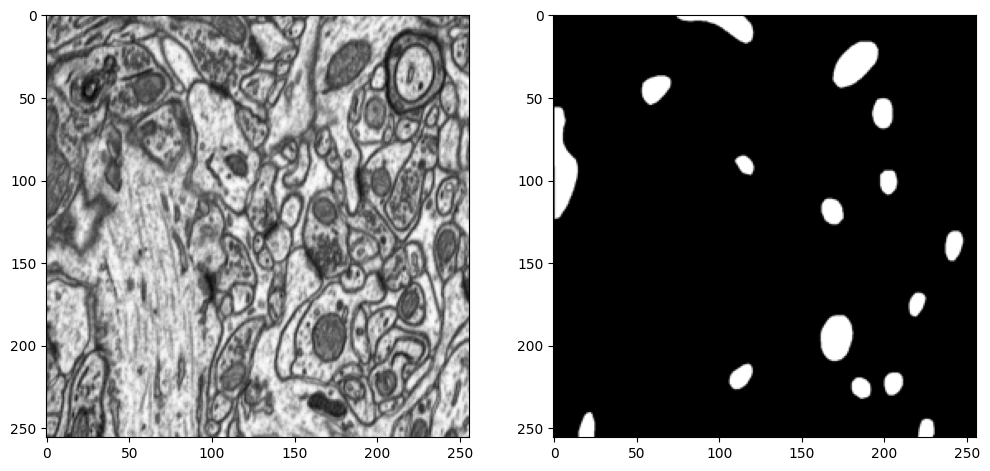

In [4]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
print(image_number)
# for image_number in range(0,330):
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.show()

In [5]:
print(mask_dataset[0].shape)

(256, 256)


In [6]:
#Normalize images
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

51


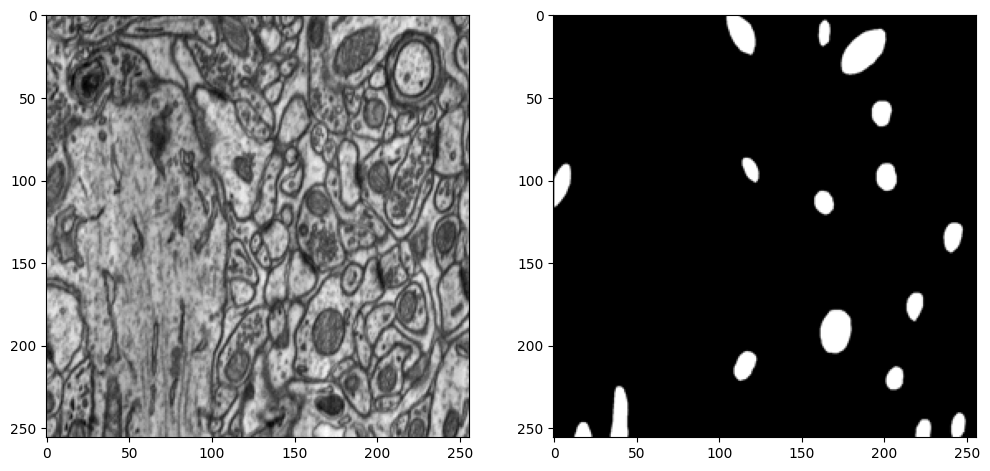

In [7]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = True)

#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
# for i in range(0,50):
print(image_number)
  # image_number=i
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.show()



In [16]:
from tensorflow.keras.callbacks import EarlyStopping

def get_model(model_name,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS):
  if(model_name=="unet_Plus_Plus"):
    return unet_Plus_Plus(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
  
def train_model(model_name,epochs,batchSize):
  IMG_HEIGHT = image_dataset.shape[1]
  IMG_WIDTH  = image_dataset.shape[2]
  IMG_CHANNELS = image_dataset.shape[3]
  model = get_model(model_name,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
  history = model.fit(X_train, y_train, batch_size = batchSize, verbose=1,validation_data=(X_test,y_test), epochs=epochs, shuffle=True)
  model_weights_name=model_name+'.hdf5'
  model.save(model_weights_name)
  _, acc = model.evaluate(X_test, y_test)
  print("Accuracy = ", (acc * 100.0), "%")

  #plot the training and validation accuracy and loss at each epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # acc = history.history['acc']
  acc = history.history['jaccard_coef']
  # val_acc = history.history['val_acc']
  val_acc = history.history['val_jaccard_coef']

  plt.plot(epochs, acc, 'y', label='Training jaccard_coef')
  plt.plot(epochs, val_acc, 'r', label='Validation jaccard_coef')
  plt.title('Training and validation jaccard_coef')
  plt.xlabel('Epochs')
  plt.ylabel('jaccard_coef')
  plt.legend()
  plt.show()
  return model
  # return model


def findIOU(y_pred,X_test,y_test):
  y_pred_thresholded = y_pred > 0.5
  intersection = np.logical_and(y_test, y_pred_thresholded)
  union = np.logical_or(y_test, y_pred_thresholded)
  iou_score = np.sum(intersection) / np.sum(union)
  print("IoU socre is: ", iou_score)


def display_images(X_test,y_test,y_pred):
  for i in range(5):
    image_number = 5+i
    plt.figure(figsize=(12, 6))
    # plt.subplot(121)
    # plt.imshow(np.reshape(X_test[image_number], (256, 256)), cmap='gray')
    plt.subplot(121)
    plt.imshow(np.reshape(y_test[image_number], (256, 256)), cmap='gray')
    plt.subplot(122)
    plt.imshow(np.reshape(y_pred[image_number], (256, 256)), cmap='gray')
    plt.show()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_62 (Conv2D)             (None, 256, 256, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_60 (Dropout)           (None, 256, 256, 32  0           ['conv2d_62[0][0]']              
                                )                                                           

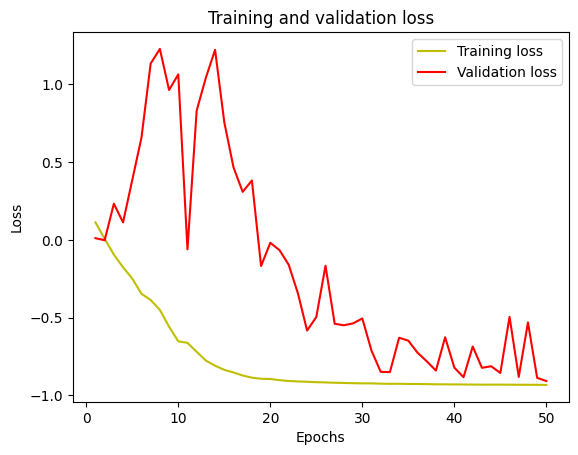

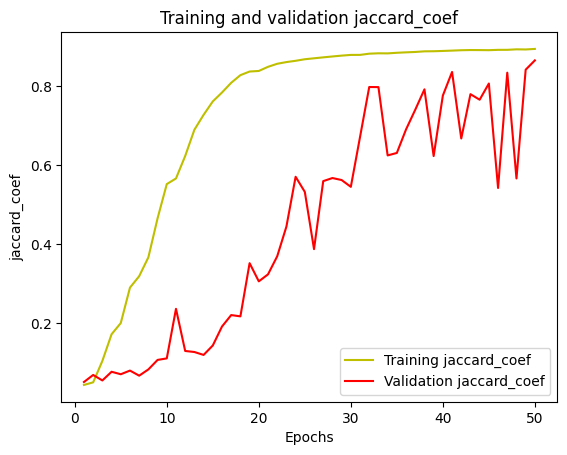

In [13]:
model=train_model("unet_Plus_Plus",50,16)


In [17]:
#without augmentation
y_pred=model.predict(X_test)
findIOU(y_pred,X_test,y_test)


3/3 [==============================] - 1s 428ms/step
IoU socre is:  0.8403249932009791


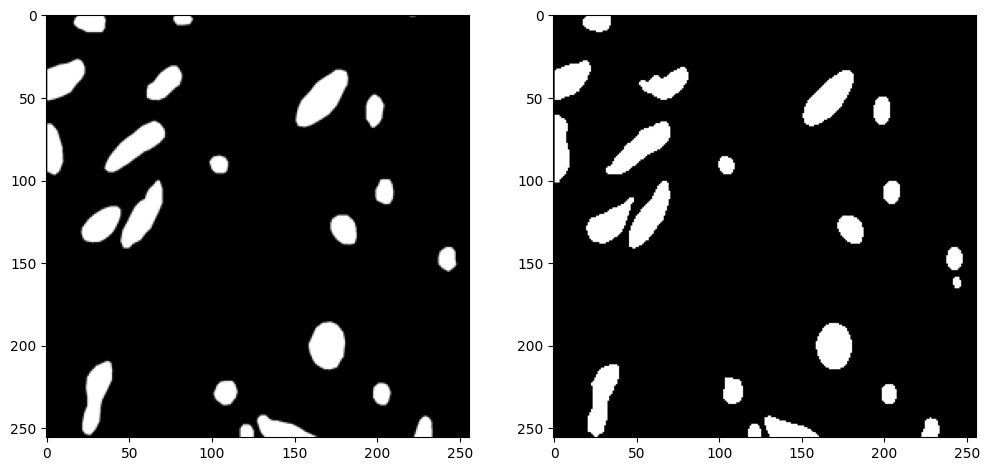

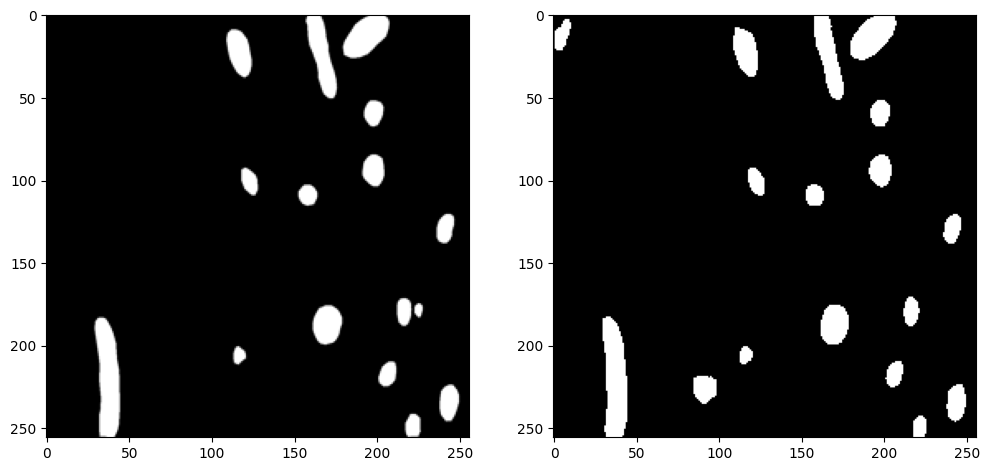

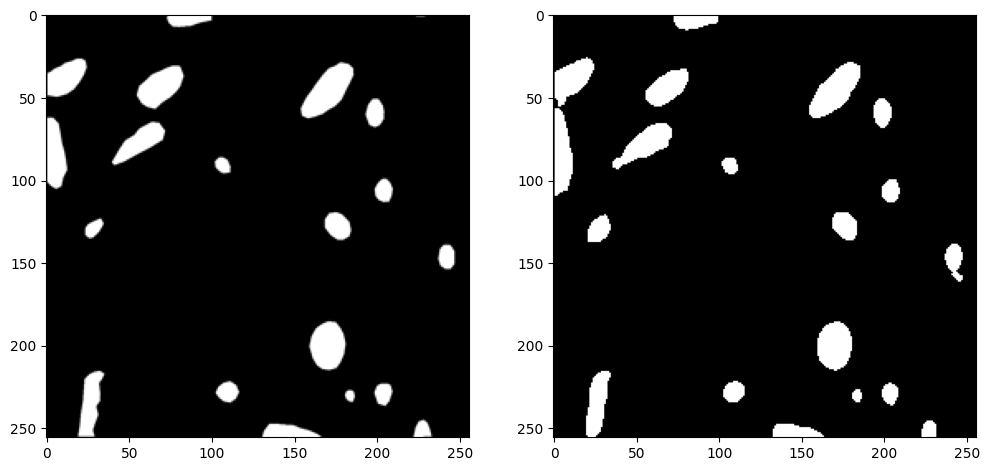

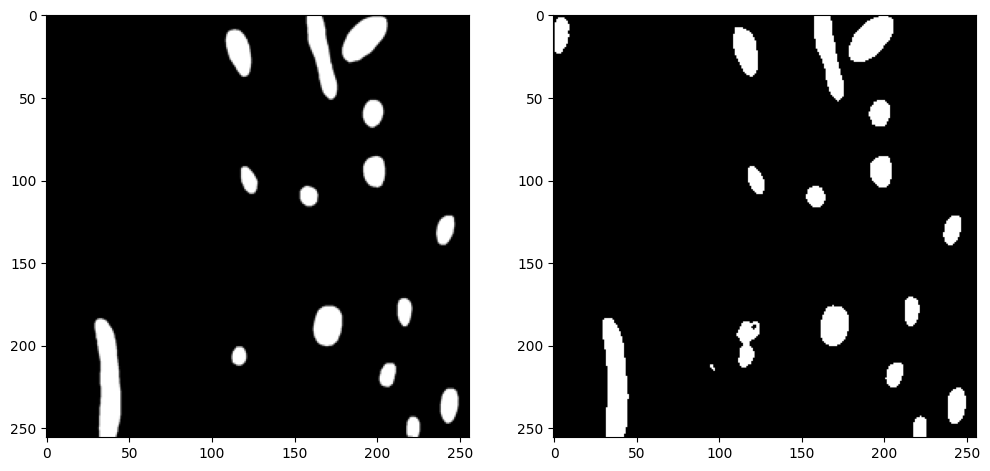

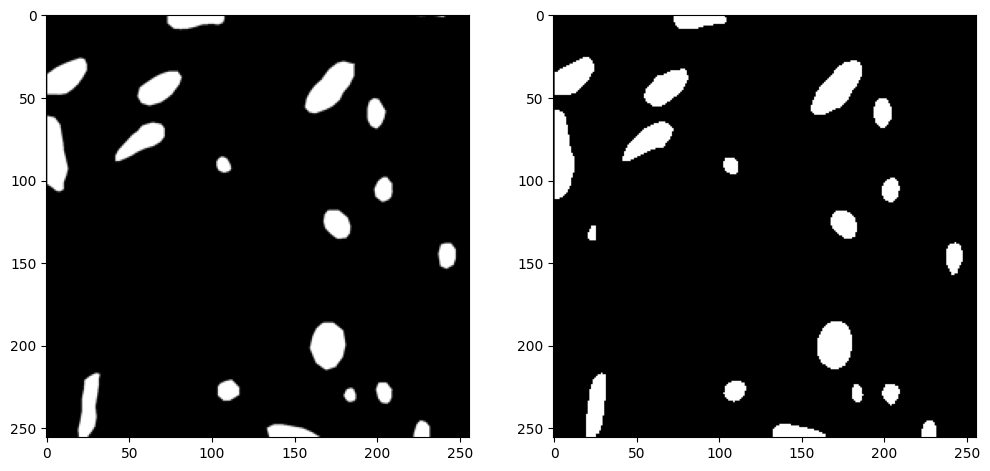

In [19]:

y_pred_thresholded = y_pred > 0.5

display_images(X_test,y_test,y_pred_thresholded)

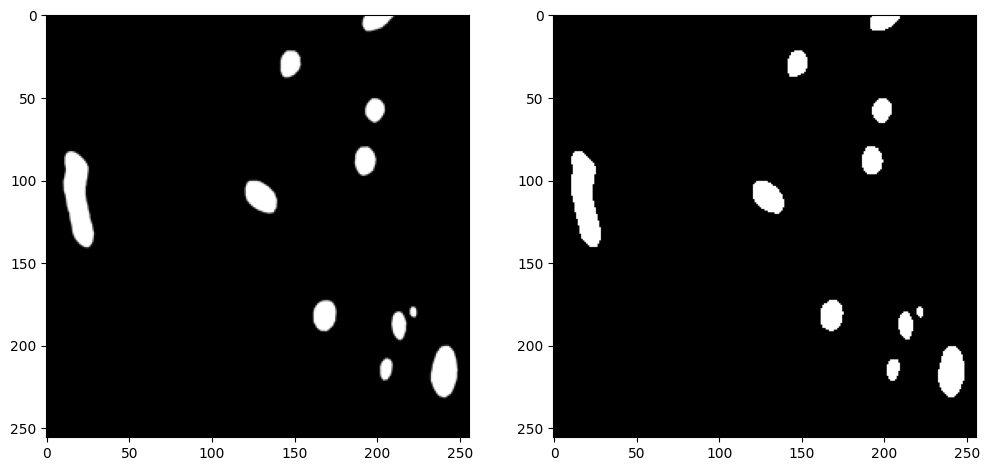

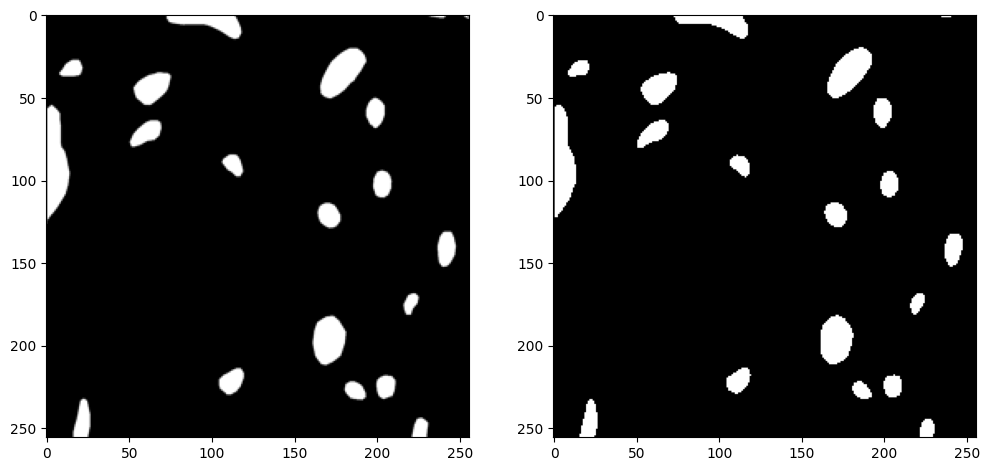

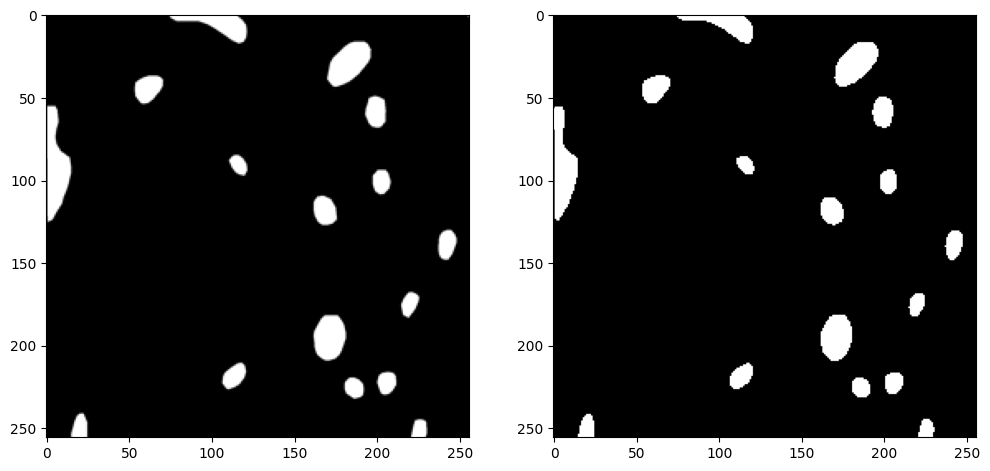

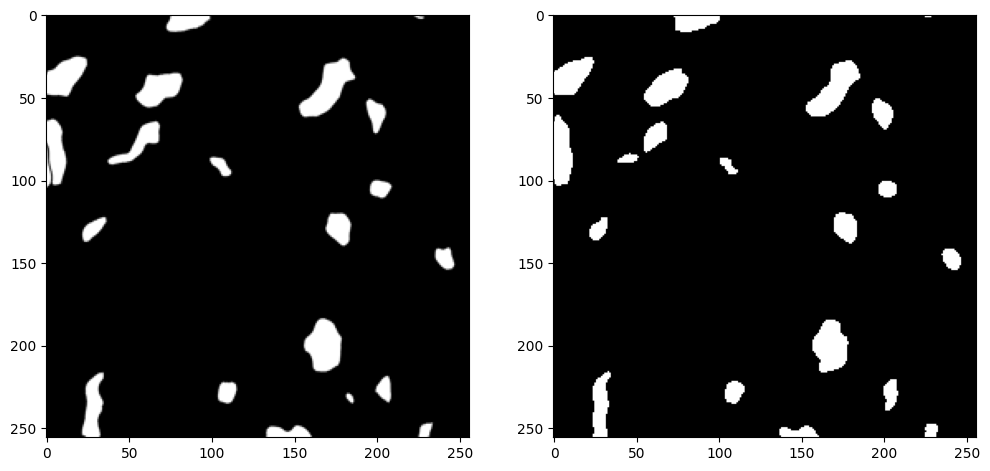

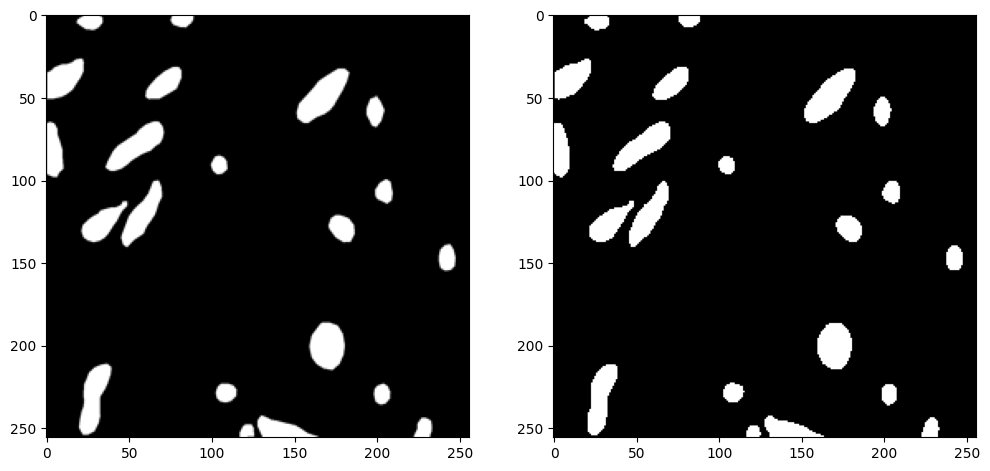

In [ ]:
#with augumentation
y_pred_thresholded = y_pred > 0.5
# print(y_pred.shape)
# print(y_pred_thresholded.shape)
display_images(X_test,y_test,y_pred_thresholded)